##### 在影片中即時繪圖
這篇教學會延伸「偵測滑鼠事件」和「合成半透明圖片」兩篇文章，實作在播放攝影機所拍攝的影片時，即時用滑鼠在影片中繪圖，\
最後將具有繪圖過程的影片儲存在電腦中。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 使用滑鼠在靜態影像中繪圖 
下方的程式執行後，會使用 numpy 的 zeros 方法，建立一個 420x240 的黑色畫布，接著搭配「偵測滑鼠事件」文章中記錄滑鼠座標的技巧，\
就能使用 line 方法不斷繪製兩點間的直線 ( 如果使用畫圓形，會因為滑鼠移動的太快而產生不連續的現象 )，最後透過偵測鍵盤事件，\
按下 q 時結束動作，按下 r 時重新繪製。

參考：[numpy.zeros()](https://steam.oxxostudio.tw/category/python/numpy/array-create.html#a3)、[line() 畫直線](https://steam.oxxostudio.tw/category/python/ai/opencv-drawing.html#a2)

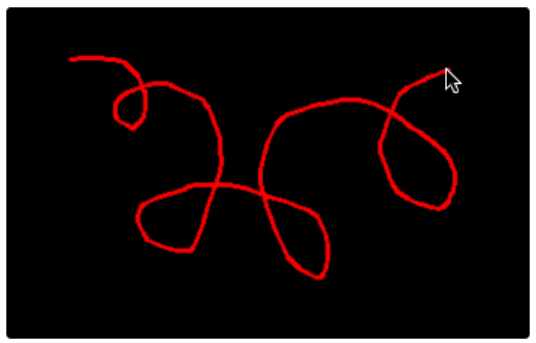

In [ ]:
import cv2
import numpy as np

dots = []   # 建立空串列記錄座標
w = 420
h = 240
draw = np.zeros((h,w,4), dtype='uint8')   # 建立 420x240 的 RGBA 黑色畫布

def show_xy(event,x,y,flags,param):
    global dots, draw                     # 定義全域變數
    if flags == 1:
        if event == 1:
            dots.append([x,y])            # 如果拖曳滑鼠剛開始，記錄第一點座標
        if event == 4:
            dots = []                     # 如果放開滑鼠，清空串列內容
        if event == 0 or event == 4:
            dots.append([x,y])            # 拖曳滑鼠時，不斷記錄座標
            x1 = dots[len(dots)-2][0]     # 取得倒數第二個點的 x 座標
            y1 = dots[len(dots)-2][1]     # 取得倒數第二個點的 y 座標
            x2 = dots[len(dots)-1][0]     # 取得倒數第一個點的 x 座標
            y2 = dots[len(dots)-1][1]     # 取得倒數第一個點的 y 座標
            cv2.line(draw,(x1,y1),(x2,y2),(0,0,255,255),2)  # 畫直線
        cv2.imshow('oxxostudio', draw)

cv2.imshow('oxxostudio', draw)
cv2.setMouseCallback('oxxostudio', show_xy)

while True:
    keyboard = cv2.waitKey(5)                    # 每 5 毫秒偵測一次鍵盤事件
    if keyboard == ord('q'):
        break                                    # 如果按下 q 就跳出
    if keyboard == ord('r'):
        draw = np.zeros((h,w,4), dtype='uint8')  # 如果按下 r 就變成原本全黑的畫布
        cv2.imshow('oxxostudio', draw)

cv2.destroyAllWindows()

`ord` 是 Python 的內建函式。它用來返回一個字符的 Unicode 碼點。例如，`ord('a')` 會返回 97，因為 'a' 的 Unicode 碼點是 97。

以下是 `ord` 函式的簡單示例：



In [ ]:
print(ord('a'))  # 輸出: 97
print(ord('A'))  # 輸出: 65
print(ord('1'))  # 輸出: 49



在你的程式碼中，`ord('q')` 和 `ord('r')` 用來檢查鍵盤輸入是否為 'q' 或 'r'。

##### 即時在攝影機影片中繪圖 
搭配「[寫入並儲存影片](https://steam.oxxostudio.tw/category/python/ai/opencv-write-video.html)」和「[合成半透明圖片](https://steam.oxxostudio.tw/category/python/ai/opencv-paste.html)」的範例，讀取攝影機的即時影像，將影像轉換為 BGRA 色彩模式，\
根據繪圖畫布的 alpha 色版數值進行合成，就能實現即時在影片中畫圖的效果 ( 最後可將整個過程儲存為新的影片 )。

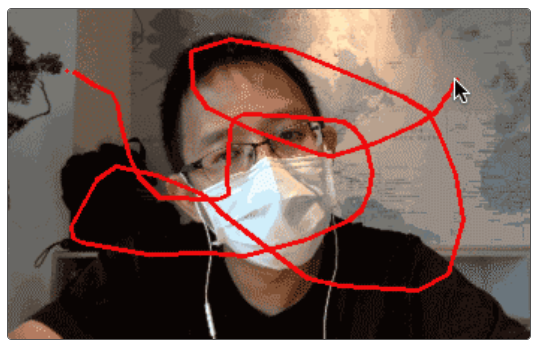

In [ ]:
import cv2
import numpy as np

# 開啟攝影鏡頭
cap = cv2.VideoCapture(0)

# 設定影像寬度和高度
w = 420
h = 240

# 建立一個空的畫布，用來繪圖
draw = np.zeros((h, w, 4), dtype='uint8')

# 設定輸出影片的格式為 MJPG
fourcc = cv2.VideoWriter_fourcc(*'MJPG')

# 產生空的影片，名稱為 'output.mov'，每秒 20 幀
out = cv2.VideoWriter('output.mov', fourcc, 20.0, (w, h))

# 檢查攝影鏡頭是否開啟成功
if not cap.isOpened():
    print("Cannot open camera")
    exit()

# 定義滑鼠事件的回呼函式
def show_xy(event, x, y, flags, param):
    global dots, draw
    if flags == 1:  # 檢查滑鼠左鍵是否按下
        if event == 1:  # 滑鼠左鍵按下事件
            dots.append([x, y])  # 記錄起始點座標
        if event == 4:  # 滑鼠左鍵放開事件
            dots = []  # 清空座標列表
        if event == 0 or event == 4:  # 滑鼠移動或放開事件
            dots.append([x, y])  # 記錄當前滑鼠位置
            x1 = dots[len(dots) - 2][0]
            y1 = dots[len(dots) - 2][1]
            x2 = dots[len(dots) - 1][0]
            y2 = dots[len(dots) - 1][1]
            # 在畫布上繪製線條
            cv2.line(draw, (x1, y1), (x2, y2), (0, 0, 255, 255), 2)

# 顯示畫布
cv2.imshow('oxxostudio', draw)

# 設定滑鼠事件的回呼函式
cv2.setMouseCallback('oxxostudio', show_xy)

while True:
    ret, img = cap.read()  # 讀取影片的每一個影格
    if not ret:
        print("Cannot receive frame")
        break
    img = cv2.resize(img, (w, h))  # 縮小尺寸，加快運算速度
    # 透過 for 迴圈合成影像
    for i in range(w):
        img[:, i, 0] = img[:, i, 0] * (1 - draw[:, i, 3] / 255) + draw[:, i, 0] * (draw[:, i, 3] / 255)
        img[:, i, 1] = img[:, i, 1] * (1 - draw[:, i, 3] / 255) + draw[:, i, 1] * (draw[:, i, 3] / 255)
        img[:, i, 2] = img[:, i, 2] * (1 - draw[:, i, 3] / 255) + draw[:, i, 2] * (draw[:, i, 3] / 255)
    keyboard = cv2.waitKey(5)
    if keyboard == ord('q'):  # 按下 'q' 鍵退出
        break
    if keyboard == ord('r'):  # 按下 'r' 鍵重置畫布
        draw = np.zeros((h, w, 4), dtype='uint8')
    cv2.imshow('oxxostudio', img)  # 顯示合成後的影像
    out.write(img)  # 儲存影片

# 釋放資源
out.release()
cap.release()
cv2.destroyAllWindows()